# Module: Big Data and Data Mining
## 
### Student ID: 201910321

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans

### Loading in the dataset and getting it ready for training.

In [2]:
# Assuming your dataset is in a CSV file named 'maternal_health_data.csv'
df = pd.read_csv('/Report Code/Data/mhs.csv')

In [3]:
'''Calculating the correlation coefficients between 'SystolicBP' and other columns in the dataframe.
This will place the weakest/negative correlations at the beginning of the output and the strongest/positive correlations at the end of the output.'''
correlations = df.corr()['SystolicBP'].sort_values()
print(correlations)

BodyTemp      -0.286616
HeartRate     -0.023108
Age            0.416045
BS             0.425172
DiastolicBP    0.787006
SystolicBP     1.000000
Name: SystolicBP, dtype: float64


C:\Users\whing\AppData\Local\Temp\ipykernel_12552\2648671081.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['SystolicBP'].sort_values()


C:\Users\whing\AppData\Local\Temp\ipykernel_12552\2059930085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<AxesSubplot:>

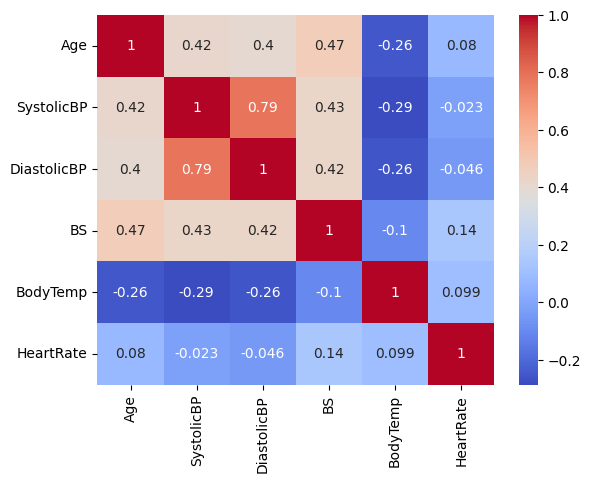

In [4]:
# Correlation matrix for to better visualize the correlation values above. 
correlations = df.corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")

### Apply the principal component analysis (PCA) to reduce number of variables.

In [5]:
# Applying PCA to reduct the number of variables in the data set.
def PCA(X, num_components):
    # Centering the data by subtracting the mean from each column.
    X_meaned = X - np.mean(X, axis=0)
    # Calculating the covariance matrix of the centered data.
    cov_mat = np.cov(X_meaned, rowvar=False)
    # Calculating the eigenvalues and eigenvectors of the covariance matrix.
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    # Sorting the eigenvalues in descending order and return the corresponding indices.
    sorted_index = np.argsort(eigen_values)[::-1]
    # Rearranging the eigenvectors based on the sorted indices.
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    # Selecting the top 'num_components' eigenvectors to form a subset.
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    # Projecting the centered data onto the eigenvector subset to obtain the reduced feature space.
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    # Returning the reduced data and the eigenvalues.
    return X_reduced, eigen_values

In [6]:
# Select the variables for PCA
X_pca = df[['BS','DiastolicBP','Age']]
y = df['SystolicBP']

In [7]:
# Calling the PCA function on the matrix X_pca, using the top 3 principal components.
X_reduced, eigen_values = PCA(X_pca, num_components=3)

In [8]:
# Calculating the sum of all the eigenvalues.
total_eigenvalues = np.sum(eigen_values)

In [9]:
# Calculate the explained variance ratio for each component
explained_variance_ratio = eigen_values / total_eigenvalues

In [10]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [11]:
# Print the explained variance ratio and cumulative explained variance
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio: [0.01974737 0.29216723 0.6880854 ]
Cumulative Explained Variance: [0.01974737 0.3119146  1.        ]


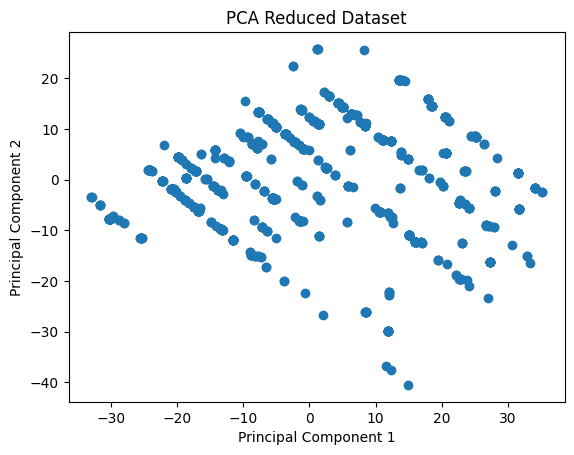

In [12]:
# Extracting the reduced data for the first two principal components.
x_values = X_reduced[:, 0]
y_values = X_reduced[:, 1]
z_values = X_reduced[:, 2]

# Create a scatter plot of the reduced data
plt.scatter(x_values, y_values)
plt.title('PCA Reduced Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

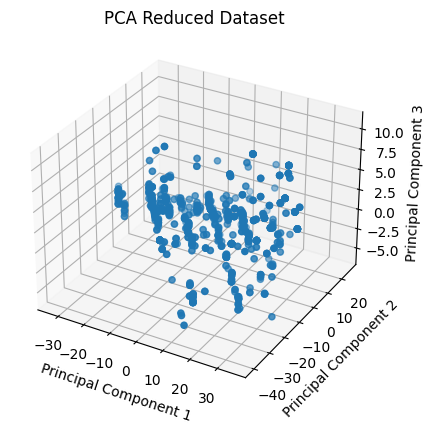

In [13]:
# Extracting the reduced data for the three principal components
x_values = X_reduced[:, 0]
y_values = X_reduced[:, 1]
z_values = X_reduced[:, 2]

# Creating a scatter plot of the reduced data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_values, y_values, z_values)
ax.set_title('PCA Reduced Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [14]:
# Splitting the reduced data into training and testing sets. X_train and X_test contain the reduced data, while y_train and y_test contain the labels.
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [15]:
# Create a pipeline to scale the features and fit the model.
pipeline = Pipeline([
    # Standardizing the data.
    ('scaler', StandardScaler()),
    # Adding polynomial features of 5 degrees. 
    ('poly', PolynomialFeatures(degree=5)), 
    # Linear regression model. 
    ('linear_model', LinearRegression()) 
])

In [16]:
# Fitting the model using the pipeline.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=5)),
                ('linear_model', LinearRegression())])

#### With preprocessing features.
To create the following with and without, the preprocessing features were commented out accordingly.

In [17]:
# Using the model to make predictions on the test data.
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Evaluating the performance of the model using various metrics. 
# Calculate Mean Squared Error
print("Mean Squared Error:", mse)
# Calculate Mean Absolute Error
print("Mean Absolute Error:", mae)
# Calculate Root Mean Squared Error
print("Root Mean Squared Error:", rmse)
# Calculate R-squared
print("R-squared:", r2)


Mean Squared Error: 77.07152780993232
Mean Absolute Error: 6.073420181650246
Root Mean Squared Error: 8.779039116550987
R-squared: 0.7618245841342779


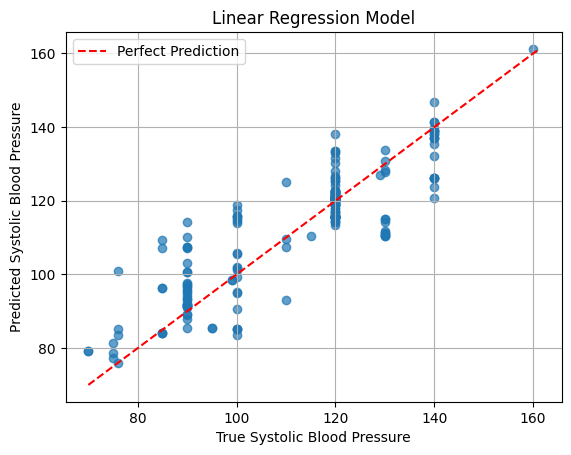

In [18]:
# Plot the true values (y_test) vs. the predicted values (y_pred)
plt.scatter(y_test, y_pred, alpha=0.7)

# Plot a diagonal line representing a perfect prediction
min_value = min(y_test.min(), y_pred.min())
max_value = max(y_test.max(), y_pred.max())
plt.plot([min_value, max_value], [min_value, max_value], color="red", linestyle="--", label="Perfect Prediction")

plt.grid()
plt.legend()
plt.title('Linear Regression Model')
plt.xlabel('True Systolic Blood Pressure')
plt.ylabel('Predicted Systolic Blood Pressure')
plt.show()

#### Without preprocessing features.

In [19]:
# Using the model to make predictions on the test data.
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Evaluating the performance of the model using various metrics. 
# Calculate Mean Squared Error
print("Mean Squared Error:", mse)
# Calculate Mean Absolute Error
print("Mean Absolute Error:", mae)
# Calculate Root Mean Squared Error
print("Root Mean Squared Error:", rmse)
# Calculate R-squared
print("R-squared:", r2)


Mean Squared Error: 77.07152780993232
Mean Absolute Error: 6.073420181650246
Root Mean Squared Error: 8.779039116550987
R-squared: 0.7618245841342779


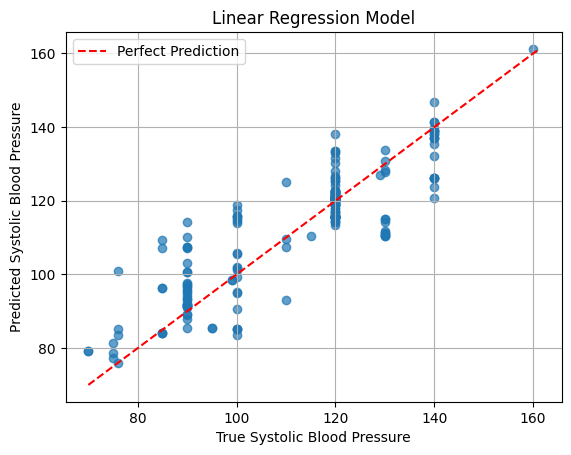

In [20]:
# Plot the true values (y_test) vs. the predicted values (y_pred)
plt.scatter(y_test, y_pred, alpha=0.7)

# Plot a diagonal line representing a perfect prediction
min_value = min(y_test.min(), y_pred.min())
max_value = max(y_test.max(), y_pred.max())
plt.plot([min_value, max_value], [min_value, max_value], color="red", linestyle="--", label="Perfect Prediction")

plt.grid()
plt.legend()
plt.title('Linear Regression Model')
plt.xlabel('True Systolic Blood Pressure')
plt.ylabel('Predicted Systolic Blood Pressure')
plt.show()


### Investigating the relationship between age and heartrate  by means of age grouping.

In [21]:
# Defining the bins and labels for all age groups. 
bins = [0, 10, 20, 40, 50, 60, 70, np.inf]
labels = ['0-9', '10-19', '20-39', '40-49', '50-59', '60-69', '70+']

# Creating a new column AgeGroup. 
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [22]:
# Calculating the mean heartrate for each age group. 
mean_heartrate = df.groupby('AgeGroup')['HeartRate'].mean()
print(mean_heartrate)

AgeGroup
0-9      70.000000
10-19    72.730640
20-39    75.088353
40-49    76.458333
50-59    71.931034
60-69    79.250000
70+            NaN
Name: HeartRate, dtype: float64


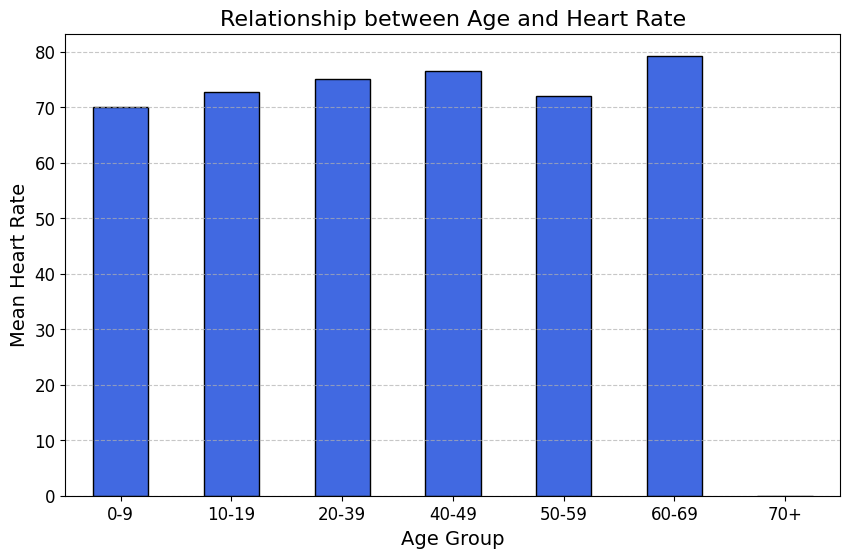

In [23]:
# Plotting the results
plt.figure(figsize=(10, 6))
mean_heartrate.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Relationship between Age and Heart Rate', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Mean Heart Rate', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Calculate and interpret: Support, Confidence, Conviction and Lift

In [24]:
# Creating a function to define blood pressure levels based on the provided thresholds.
def categorize_bp(value, threshold_low, threshold_high):
    if value < threshold_low:
        return 'Low'
    elif value > threshold_high:
        return 'High'
    else:
        return 'Normal'

In [25]:
# Creating new columns and defining the thresholds provided. 
df['SystolicBPLevel'] = df['SystolicBP'].apply(lambda x: categorize_bp(x, 110, 140))
df['DiastolicBPLevel'] = df['DiastolicBP'].apply(lambda x: categorize_bp(x, 70, 90))

In [26]:
# One-hot encode the df
encoded_df = pd.get_dummies(df[['SystolicBPLevel', 'DiastolicBPLevel']])

In [27]:
# Apply the Apriori algorithm to the encoded df to find frequent items. 
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

c:\Users\whing\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [28]:
# Calculate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [29]:
# Filter the rules to show only high/high, normal/normal, and low/low diastolic and systolic blood pressure pairs
filtered_rules = rules[
    rules['antecedents'].apply(lambda x: x.issubset({'DiastolicBPLevel_High', 'DiastolicBPLevel_Normal', 'DiastolicBPLevel_Low'})) &
    rules['consequents'].apply(lambda x: x.issubset({'SystolicBPLevel_High', 'SystolicBPLevel_Normal', 'SystolicBPLevel_Low'}))
]

# Display the filtered rules
filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'conviction', 'lift']].sort_values(by='confidence', ascending=False)


,antecedents,consequents,support,confidence,conviction,lift
2,(DiastolicBPLevel_High),(SystolicBPLevel_Normal),0.111440,0.918699,4.294083,1.411456
3,(DiastolicBPLevel_Normal),(SystolicBPLevel_Normal),0.489152,0.870175,2.689109,1.336906
1,(DiastolicBPLevel_Low),(SystolicBPLevel_Low),0.266272,0.841121,4.158835,2.479352


### Find clusters of patients with similar Systolic BP.

In [30]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(6, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    df['Cluster'] = kmeans.fit(df[['SystolicBP']])
    wcss.append(kmeans.inertia_)

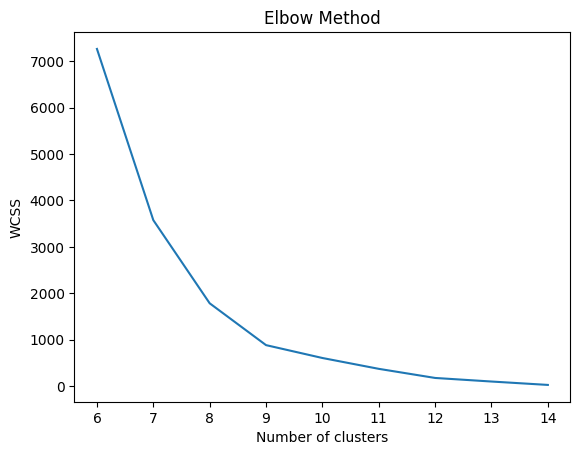

In [31]:
plt.plot(range(6, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Fitting the K-Means clustering model.
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['SystolicBP']])

In [33]:
# Grouping the data by 'Cluster' and calculating the summary statistics.
cluster_summary = df.groupby('Cluster')['SystolicBP'].agg(['count', 'mean', 'std'])

In [34]:
# Resetting the index to make Cluster a regular column.
cluster_summary.reset_index(inplace=True)

In [35]:
# Rounding the mean values. 
cluster_summary['mean'] = cluster_summary['mean'].round(2)
# Rounding the standard deviation values.
cluster_summary['std'] = cluster_summary['std'].round(2)

In [36]:
cluster_summary.columns = ['Cluster', 'Count', 'Mean Systolic BP', 'Standard Deviation']

In [37]:
print(cluster_summary)

   Cluster  Count  Mean Systolic BP  Standard Deviation
0        0    123            139.88                0.77
1        1    154             90.00                0.00
2        2    457            119.91                0.66
3        3    106             99.42                1.59
4        4     39             75.38                2.98
5        5     61            129.98                0.13
6        6     10            160.00                0.00
7        7     19            110.00                0.00
8        8     45             84.91                0.42


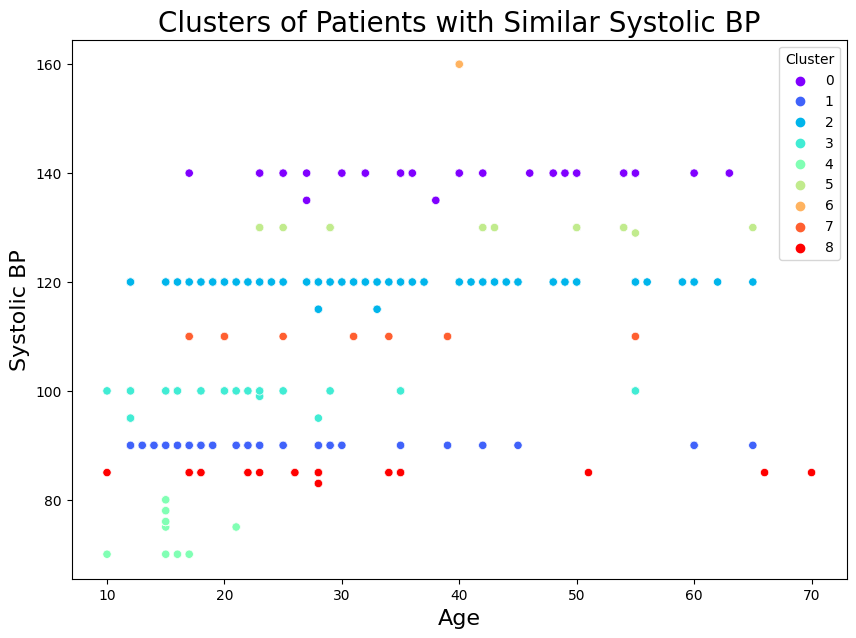

In [38]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))  
sns.scatterplot(data=df, x='Age', y='SystolicBP', hue='Cluster', palette='rainbow', legend='full')
plt.title('Clusters of Patients with Similar Systolic BP', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Systolic BP', fontsize=16)
plt.show()

### Calculate the correlation between age and systolic BP.

In [39]:
# Calculating the correlation between age and SystolicBP. 
correlation = df['Age'].corr(df['SystolicBP'])
print("Correlation between age and systolic BP:", correlation)

Correlation between age and systolic BP: 0.4160454479747331


c:\Users\whing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


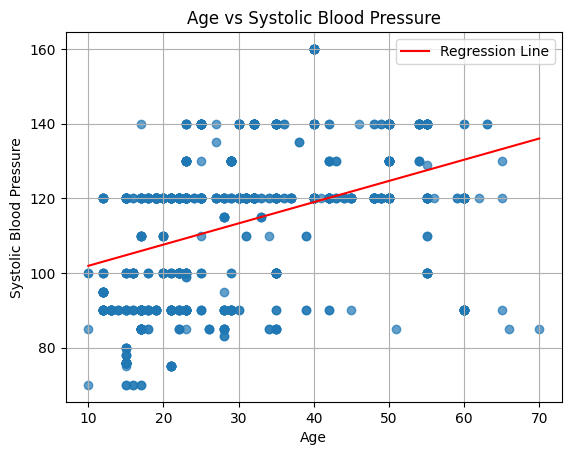

In [40]:
'''In order to create the correlation graph between age and systolicBP another linear model was created with only Age as the input parameter.
   A simple linear model was created with only Age as the input parameter.'''

# Adding StandardScaler to standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age']])

# Fitting a linear regression model with only age as the input variable.
model = LinearRegression()
model.fit(X_scaled, df['SystolicBP'])

# Adding the regression line.
x_line = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y_line = model.predict(scaler.transform(x_line.reshape(-1, 1)))

# Plotting the scatter plot. 
plt.scatter(df['Age'], df['SystolicBP'], alpha=0.7)
plt.plot(x_line, y_line, color="red", label="Regression Line")
plt.grid()
plt.legend()
plt.title('Age vs Systolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.show()